<img src='../img/theory/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류 - MNIST
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---Fashion-MNIST" data-toc-modified-id="예제---Fashion-MNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - Fashion MNIST</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST-데이터-불러오기" data-toc-modified-id="Fashion-MNIST-데이터-불러오기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fashion MNIST 데이터 불러오기</a></span></li><li><span><a href="#Fashion-MNIST-데이터-형태-확인하기" data-toc-modified-id="Fashion-MNIST-데이터-형태-확인하기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fashion MNIST 데이터 형태 확인하기</a></span><ul class="toc-item"><li><span><a href="#Train-데이터셋" data-toc-modified-id="Train-데이터셋-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Train 데이터셋</a></span></li><li><span><a href="#Validation-데이터셋" data-toc-modified-id="Validation-데이터셋-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Validation 데이터셋</a></span></li><li><span><a href="#Test-데이터셋" data-toc-modified-id="Test-데이터셋-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Test 데이터셋</a></span></li></ul></li><li><span><a href="#데이터-시각화하기" data-toc-modified-id="데이터-시각화하기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 시각화하기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#모델-구성" data-toc-modified-id="모델-구성-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>모델 구성</a></span></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-확인" data-toc-modified-id="모델-확인-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>모델 확인</a></span></li></ul></li><li><span><a href="#신경망-모델-학습" data-toc-modified-id="신경망-모델-학습-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>신경망 모델 학습</a></span></li><li><span><a href="#신경망-모델-평가" data-toc-modified-id="신경망-모델-평가-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>신경망 모델 평가</a></span></li><li><span><a href="#신경망-모델-검증하기" data-toc-modified-id="신경망-모델-검증하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>신경망 모델 검증하기</a></span></li><li><span><a href="#다음-예제에서는" data-toc-modified-id="다음-예제에서는-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>다음 예제에서는</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/minsuk/anaconda3/

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='default')

%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1486496404936312892
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1494835832195896811
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7639764173
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6498531796935105337
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4928824136441955388
physical_device_desc: "device: XLA_GPU device"
]






['/job:localhost/replica:0/task:0/device:GPU:0']

---

## 예제 - Fashion MNIST

<img src='https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg' width=70%>

Fashion-MNIST는 60,000 개의 학습 세트와 10,000 개의 테스트 세트로 구성된 Zalando의 기사 이미지 데이터 세트입니다. 각 예제는 28 개의 28 개의 회색조 이미지이며 10 개의 클래스 레이블과 연결되어 있습니다. Fashion-MNIST는 기계 학습 알고리즘 벤치마킹을 위해 원본 MNIST 데이터 세트를 직접 대체하는 역할을합니다.

출처 : [zalando research](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/)

### Fashion MNIST 데이터 불러오기

In [6]:
train = pd.read_csv('./data/fashion-mnist/fashion-mnist_train.csv')
test = pd.read_csv('./data/fashion-mnist/fashion-mnist_test.csv')

X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
X_test = np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])

In [7]:
# Train / Validation 데이터 분리하기
# Train 데이터를 Train / Validation 으로 나누어줌으로써 Overfitting 여부를 파악
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=13)

In [8]:
# Train / Test 데이터의 크기 확인
print('Fashion MNIST Train 데이터의 크기 : {}'.format(len(X_train)))
print('Fashion MNIST Validation 데이터의 크기 : {}'.format(len(X_valid)))
print('Fashion MNIST Test 데이터의 크기 : {}'.format(len(X_test)))

Fashion MNIST Train 데이터의 크기 : 48000
Fashion MNIST Validation 데이터의 크기 : 12000
Fashion MNIST Test 데이터의 크기 : 10000


### Fashion MNIST 데이터 형태 확인하기

#### Train 데이터셋

In [9]:
print("X_train Shape : ",X_train.shape) # 28*28짜리 크기의 숫자 이미지 48000개
print("y_train Shape : ",y_train.shape) # 각 이미지별 레이블 48000개

X_train Shape :  (48000, 784)
y_train Shape :  (48000,)


#### Validation 데이터셋

In [10]:
print("X_val Shape : ",X_valid.shape) # 28*28짜리 크기의 숫자 이미지 12000개
print("y_val Shape : ",y_valid.shape) # 각 이미지별 레이블 12000개

X_val Shape :  (12000, 784)
y_val Shape :  (12000,)


#### Test 데이터셋

In [11]:
print("X_test Shape : ",X_test.shape) # 28*28짜리 크기의 숫자 이미지 10000개
print("y_test Shape : ",y_test.shape) # 각 이미지별 레이블 10000개

X_test Shape :  (10000, 784)
y_test Shape :  (10000,)


### 데이터 시각화하기

그러면 이제 구체적으로 Fashion MNIST의 Train 데이터셋의 첫번재 데이터를 확인해보자.

In [12]:
X_train[0].shape

(784,)

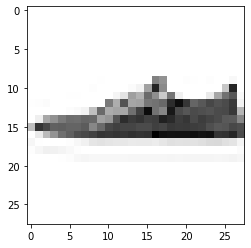

In [13]:
plt.imshow(X_train[0].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

50000개의 중 랜덤으로 한번 살펴보자

In [14]:
def get_classlabel(code):
    label = {0: 'T-Shirt',
             1: 'Pants',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandle',
             6: 'Shirt',
             7: 'Sneakers',
             8: 'Bag',
             9: 'AnkleBoots'}
    return label[code]

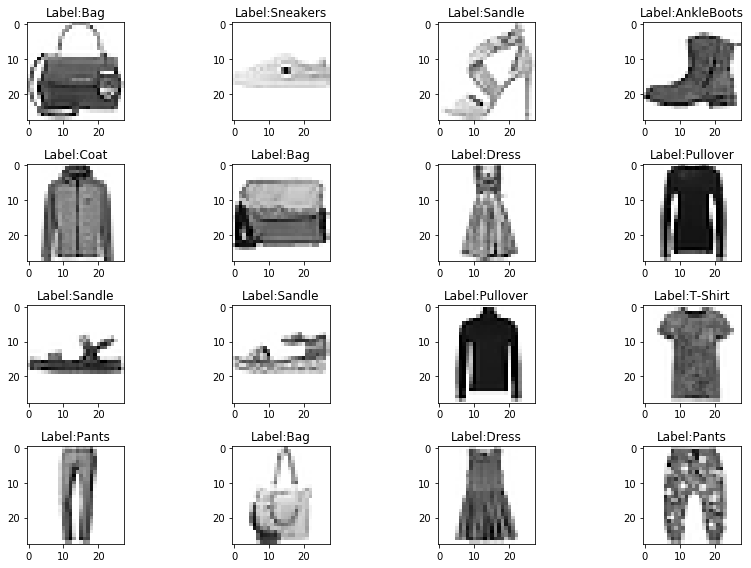

In [15]:
# 재연성을 위하여 랜덤시드 고정
np.random.seed(1234)  

# random 함수를 통해서 임의의 16개 데이터 가져오기
samples = np.random.randint(0,len(X_train)+1,size=16)

# Fashion MNIST를 그릴 Figure 준비
plt.figure(figsize=(12,8))

# 16개의 이미지 시각화
for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    label_name = "Label:" + str(get_classlabel(y_train[n]))
    plt.title(label_name)

plt.tight_layout()
plt.show()

### 데이터 전처리

In [16]:
# 데이터 크기 조정(Data Reshape)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_valid = X_valid.reshape(X_valid.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# 데이터 정규화(Data Regularization)
# 이 과정을 통해서 추후 학습할 신경망이 조금 더 학습이 원할히 될 수 있게함
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

# 원-핫 인코딩(One Hot Encoding)
# Keras의 to_categorical함수를 통해서 모든 Train 데이터의 레이블을 벡터화(Vectorize)
# ex) [3] -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train, 10) 
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test, 10)

### 모델링

간단하게 CNN 모델을 이용하여, MNIST 데이터를 분류해보자.

In [17]:
INPUT_SHAPE = (28,28,1)
KERNEL_SIZE = (3, 3)
DROP_RATE = 0.3

#### 모델 구성
Keras에서는 add함수를 통해서 레고 블록을 조립하듯이, 원하는 Layer를 추가 가능함  
여기서는 Conv Layer와 MaxPooling Layer 그리고 Dense Layer를 이용하여 모델을 구성하도록 하자

In [18]:
model = Sequential()

# 1번쨰 ConvNet
# Conv Layer
model.add(Conv2D(filters=64,
                 kernel_size=KERNEL_SIZE,
                 activation='relu',
                 input_shape=INPUT_SHAPE
                 ))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2번쨰 Conv Layer
# Conv Layer
model.add(Conv2D(filters=128,
                 kernel_size=KERNEL_SIZE,
                 activation='relu',
                 ))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 분류를 하기 위해 shape을 1차원으로 맞추는 Layer
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=DROP_RATE))

# 마지막 분류를 하기 위한 Fully Connected Layer
# One Hot Encoding을 했으므로 activation function은 softmax로 처리함
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### 모델 컴파일

In [19]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])

#### 모델 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3277824   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

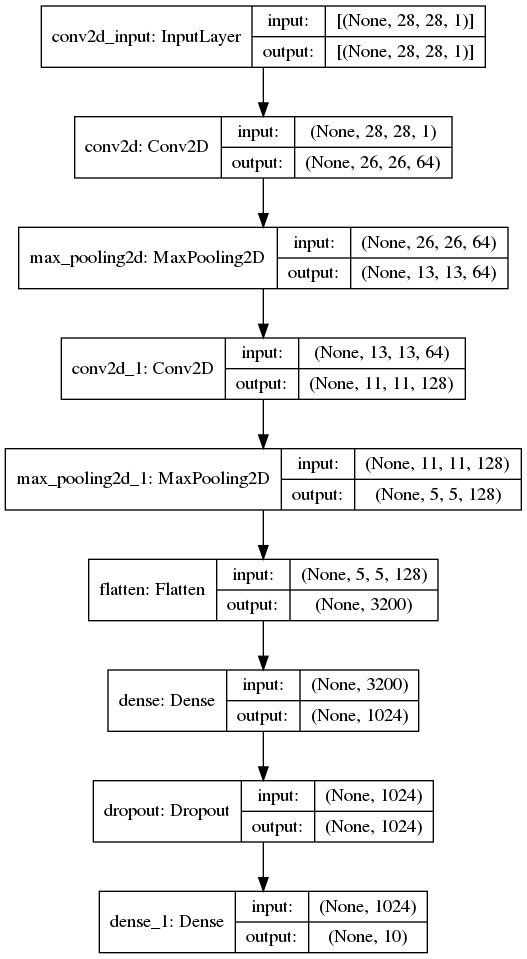

In [20]:
model.summary()

plot_model(model, to_file='./img/model/fashion_mnist_cnn_model.png', show_shapes=True)

### 신경망 모델 학습

Keras의 `fit`의 메소드를 통해서 간단하게 학습가능하다. 이번 예제에서는 여기서는 10번의 epoch만으로 학습을 진행하도록 한다. 그리고 앞서 준비한 검증 데이터(Validation Set)을 통해서 신경망의 오버피팅 여부를 판단하도록 하자.

In [21]:
EPOCHS = 10
BATCH_SIZE = 128

In [22]:
history = model.fit(X_train,  # 학습할 데이터
                    y_train,  # 학습할 레이블
                    epochs=EPOCHS,  # 전체 학습할 횟수
                    batch_size=BATCH_SIZE,  # 배치 사이즈
                    use_multiprocessing=True,
                    validation_data=(X_valid, y_valid) # 검증 데이터로 확인
                   )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4986 - acc: 0.8196 - val_loss: 0.3629 - val_acc: 0.8686
Epoch 2/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3163 - acc: 0.8859 - val_loss: 0.2863 - val_acc: 0.8930
Epoch 3/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2643 - acc: 0.9032 - val_loss: 0.2611 - val_acc: 0.9026
Epoch 4/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2334 - acc: 0.9144 - val_loss: 0.2558 - val_acc: 0.9045
Epoch 5/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.2049 - acc: 0.9244 - val_loss: 0.2633 - val_acc: 0.9047
Epoch 6/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.1814 - acc: 0.9317 - val_loss: 0.2417 - val_acc: 0.9123
Epoch 7/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.1605 - acc: 0.9401 - val_loss: 0

In [23]:
# 학습된 모델 weight 저장 
model.save('./bin/fashion_mnist_cnn.h5')

### 신경망 모델 평가

위에서 학습된 결과를 시각화 해보자

In [24]:
# Train 데이터로 평가하기
train_loss, train_acc = model.evaluate(X_train,y_train,verbose=0)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

# Validation 데이터로 평가하기
valid_loss, valid_acc = model.evaluate(X_valid,y_valid,verbose=0)
print('Validation Loss : {}'.format(valid_loss))
print('Validation Accuracy : {}'.format(valid_acc))

Train Loss : 0.07145159787257822
Train Accuracy : 0.9743541479110718
Validation Loss : 0.2570084097534418
Validation Accuracy : 0.9183333516120911


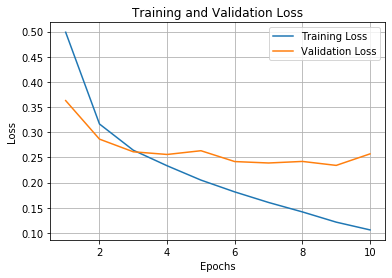

In [25]:
# Train / Validation 데이터에 대해서 Loss 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

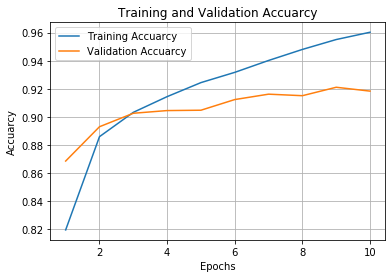

In [26]:
# Train / Validation 데이터에 대해서 Accuracy 시각화
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.grid(True)
plt.show()

### 신경망 모델 검증하기

MNIST 데이터셋을 학습한 모델을 놀랍게도 정확도 99% 이상의 성능을 보인다.  
그렇다면 이러한 신경망이 학습에 전혀 사용되지 않는 데이터인 Test 데이터셋에서는 어떤 결과를 보이는지 살펴보자

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Validation Loss : {}'.format(test_loss))
print('Validation Accuracy : {}'.format(test_acc))

Validation Loss : 0.23800334943830967
Validation Accuracy : 0.9211999773979187


Test 데이터에 대해서도 99%의 정확도를 보여준다.  

그러면 과연 학습된 신경망이 어떠한 데이터를 잘 못 예측했는지 살펴보자.

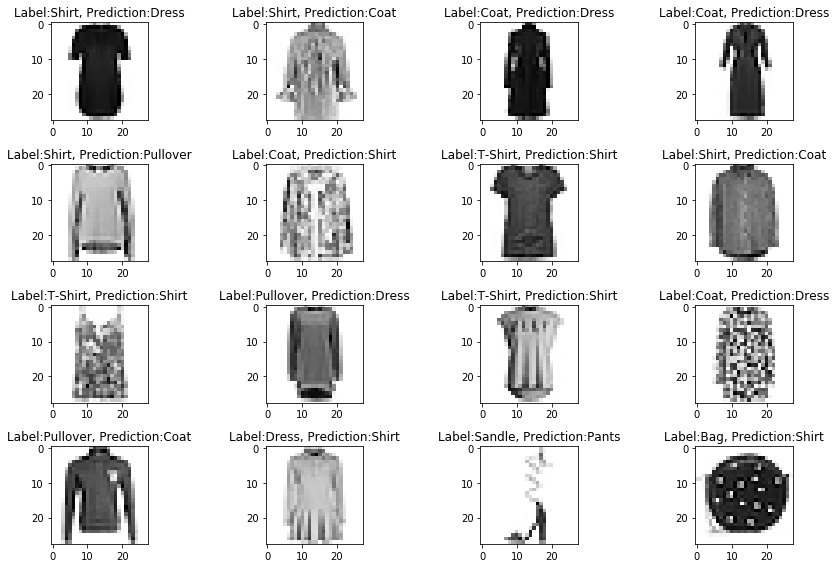

In [29]:
# 재연성을 위하여 랜덤시드 고정
random.seed('intel') 

# TEST 데이터 예측하기
predicted_result = model.predict(X_test) 
predicted_labels = np.argmax(predicted_result, axis=1)

# TEST 데이터의 정답 가져오기
test_labels = np.argmax(y_test, axis=1)

# 잘못 예측한 데이터 찾기
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

# random 함수를 통해서 임의의 16개 데이터 가져오기
samples = random.choices(population=wrong_result, k=16)

# MNIST를 그릴 Figure 준비
plt.figure(figsize=(12,8))

# 16개의 이미지 시각화
for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(get_classlabel(test_labels[n])) + ", Prediction:" + str(get_classlabel(predicted_labels[n]))
    plt.title(tmp)

plt.tight_layout()
plt.savefig('./img/result/fashion_mnist_wrong_result.png')
plt.show()

### 다음 예제에서는

CNN을 통해서 MNIST와 같은 간단한 예제를 분류할 수 있었다. 다음 예제에서는 RGB 이미지를 한번 분류하는 예제를 더 깊은 CNN으로 수행해보도록 하자.

---

## 참고

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
    - https://pinkwink.kr/1121
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html